## *Car price Prediction using Linear regression*


### *Phase 1. Problem Defination*
#### *Business Problem*
- *The automobile market is highly competative with customer having a wide range of choices across different brands, models, engine types and features. Price a car correctly is crutical - setting the price too high reducing sales, while pricing too low reduces profit margins*
#### *Objective*
- *TO buld a predictive model that can accurately estimate the price of a car based on its atttributes (eg - brand, engine size, fuel type, dimensions, horsepower, etc).*
#### *Problem Statement*
- *Given a dataset of cars specifications and their correspoinding prices, builds a regression model that can predict the price of a car for new/ unseeen data. THe model should also identify which feature significantly influence car price.*
#### *Sucess Criteria*
- ***Business Suscess**: The model helps car manufactures, dealers, or online platforms set competative and fair prices.*
- ***ML Sucess**: The model should achieve a high $R^2$ score (close to 1) and a lower error(RMSE/ MAE) on test data.*
- ***Stastical Sucess**:In OLS analysis, most significant features should have p-value < 0.05, confirming their influence.*
---

#### *Interpretation & Insights*
- *Train $R^2$ = 0.95 -> model explains ~ 95% of vrarience in traning data.*
- *Test R² = 0.87 → still very good generalization.*
- *RMSE ≈ ₹1,078 (train) vs ₹1,472 (test) → error margin is acceptable considering car     prices are often in lakhs.*
- *Cross-validation Avg R² ≈ 0.82 → stable across folds, not just a lucky split.*

#### *Feature Significance (p-value < 0.05)*
- ***wheelbase (+)** → longer wheelbase = higher price.*
- ***carlength (−)** → surprisingly, longer cars (controlling for other factors) reduce predicted price → multicollinearity with wheelbase/capacity.*
- ***carheight (−)** → taller cars reduce price (could be hatchbacks, utility style).*
- ***curbweight (+)** → heavier = premium cars.*
- ***highwaympg (+)** → slight positive, but often mpg correlates with efficiency class.*
- ***aspiration_turbo (+)** → turbo engines fetch a premium.*
- ***carbody types (sedan/hatchback/wagon/hardtop = −)** → all negatively compared to baseline category (convertible?), showing those are relatively cheaper.*
- ***enginetype_l (−), cylindernumber_four (+), fuelsystem_2bbl (+), fuelsystem_idi (+)** → engine/tech attributes affecting price.*
- ***CarBrand Efffect***
  - ***BMW (+), Porsche (+)** big premium.*
  - ***Peugeot (−)** cheaper.*

#### *Potiential Issues*
- ***Multicollinearity** → Huge std errors (e.g., enginesize, horsepower) make some known drivers look insignificant.*
- ***Dummy variable trap risk** → Some coefficients blow up / cancel due to collinearity (e.g., brands & fuelsystem).*
- ***Cond. No. = 1.36e+16** → confirms extreme multicollinearity.*

#### *Business Insights*
- *Performance & Size Drive Price → curbweight, wheelbase, turbo, cylinders strongly impact price.*
- *Brand Premium Exists → BMW, Porsche command higher prices, while Peugeot & Dodge underperform.*
- *Body Style Matters → hatchbacks, sedans, wagons generally cheaper than luxury baselines.*
- *Fuel/Engine Features → Certain fuelsystems (e.g., IDI, 2bbl) and engine configs impact price independently.*
- *Efficiency vs Luxury Tradeoff → Fuel economy interacts with performance — luxury cars may show counterintuitive mpg-price patterns.*

### *Phase 2. Data Acquisition*
#### *1. Identify the Data Source*
- *I am using **Car price dataset** which contains car specification (brand, engine type, dimension, performance metrics, etc) and their corresponding price.*
- *Source: Kaggle*
#### *2. Gathering Data*
- *The Dataset is already available in `.csv` format*
#### *3. loading the Data*

In [1]:
import pandas as pd

# Loading dataset
df = pd.read_csv("CarPrice_Assignment.csv")

# preview first 5 rows
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### *4. Initial Data Inspection*

In [2]:
# Shape of the dataset
print("Rows, Columns:", df.shape)

# Data Type & non - null counts
print(df.info())

# Quick summary
df.describe(include = "all").T

Rows, Columns: (205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        2

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car_ID,205.0,NaN,NaN,NaN,103.0,59.322565,1.0,52.0,103.0,154.0,205.0
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
CarName,205,147,toyota corona,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltype,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumber,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheel,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9


#### *Observation (Phase 2:Data Acquistion)*
#### *Data set overview*
- ***Shape**: 205 rows, 26 columns*.
- ***Target variable**: `price`(float64).*
- ***Features**: 25 (8float, 8int, 10 object)*
#### *General Observation*
1. *No Missing values(all columns have 205 non-null entries).*
2. *Mixed **cateories(object)** and **numeric(int/ float)** features.*
#### *Categorical Features*
1. *`CarName`: 147 unique values (typos & brand variant expected).*
2. *`floattype`: 2 categories (`gas` dominant: 185 cars).*
3. *`aspiration`:2 categories(`std` dominant: 168 cars).*
4. *`doornumber`: 2 categories(`four` dominant:115 cars).*
5. *`carbody`: 5 categories (`sedan` dominant : 96 cars).*
6. *`drivewheel`:3 categories (`fwd` dominant : 120 cars).*
7. *`enginelocation`: 2 Categories (`font` dominant : 202 cars).*
8. *`enginetype`: 7 Categories(`ohc` dominant: 148 cars).*
9. *`cylindernumber`: 7 Categories (`four` dominant: 159 cars).*
10. *many categorical features are imbalance (one category dominates).*

#### *Numerical Features*
1. *`symboling`: Range from -2 to 3(insurance risk rating)*
2. *`wheelbase`: 86.6 - 120.9 (avg~ 98.8)*
3. *`carlength`: 141.1 - 208.1 (avg ≈ 174.0)*.
4. *`carwidth`: 60.3 – 72.3 (avg ≈ 65.9).*
5. *`carheight`: 47.8 – 59.8 (avg ≈ 53.7).*
6. *`curbweight`: 1488 – 4066 (avg ≈ 2555).*
7. *`enginesize`: 61 – 326 (avg ≈ 126.9).*
8. *`boreratio`: 2.54 – 3.94 (avg ≈ 3.33).*
9. *`stroke`: 2.07 – 4.17 (avg ≈ 3.26).*
10. *`compressionratio`: 7.0 – 23.0 (avg ≈ 10.1).*
11. *`horsepower`: 48 – 288 (avg ≈ 104).*
12. *`peakrpm`: 4150 – 6600 (avg ≈ 5125).*
13. *`citympg`: 13 – 49 (avg ≈ 25.2).*
***Note**: Large ranges in features like `compressionratio`, `enginesize`, `horsepower`, `price` -> possible outliers.*

#### *Target variable (price)*
1. *Range: 5118 - 45400*
2. *Average : 13277*
3. *Std Dev : 7989*
4. *Skewed Distribution (many lower- priced cars, fewer high-priced)*
highwaympg: 16 – 54 (avg ≈ 30.8).*

### *Pahse 4. Data Cleaning and Preprocing*

#### *1. Handle irrelevant Columns*

In [3]:
df.drop('car_ID', axis=1, inplace=True)

#### *2. Fixed `CarName` column*
- *`CarName` contains **brands** + **model**. Extracted brand only.*
- *normalize brand names (typos like "toyot", "vokswagen", "porcshe")*

In [4]:
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
# fix typos
df['CarBrand'] = df['CarBrand'].replace({
    'vw':'volkswagen',
    'vokswagen':'volkswagen',
    'porcshce':'porsche',
    'toyot':'toyota',
    'maxda':'mazda'
})
df.drop('CarName', axis=1, inplace=True)

#### *3.Check Duplicates*
- *Verify if duplicate rows exist and drop them*

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

#### *4. Categorical Encoding*
- *Convert categorical variables (`fueltype`, `aspiration`, `doornumber`, `carbody`, `drivewheel`, `enginelocation`, `enginetype`, `cylindernumber`, `fuelsystem`, `Carbrand`)*
*into dummy variables using One-Hot Encoding.*

In [6]:
# Always keep a clean copy before encoding
df_raw = df.copy()

In [7]:
df = pd.get_dummies(df, drop_first=True)

#### *5.Numerical Features* 
- *Outlier treatement (eg - using IQR or capping) for `price`, `enginesize`, `horsepower`, etc*

In [8]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df = df[(df['price'] >= lower) & (df['price'] <= upper)]

#### *6. Feature Scaling*
- *Applying **StandardScaleer** or **MinMaxScaler** to numerical features (`wheelbase`, `carlength`, `carwidth`, `curbweight`, `enginesize`, `horsepower`, `citympg`, `highwaympg`, etc.)*
- *This is specially for **Linear Regression***

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['wheelbase','carlength','carwidth','carheight',
            'curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm',
            'citympg','highwaympg']
df[num_cols] = scaler.fit_transform(df[num_cols])

#### *7. Train - Test Split*
- *Split before modeling*

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### *Phase 5. Deeper EDA & Featured Enginerring*

#### *1. Numerical Features Analysis*

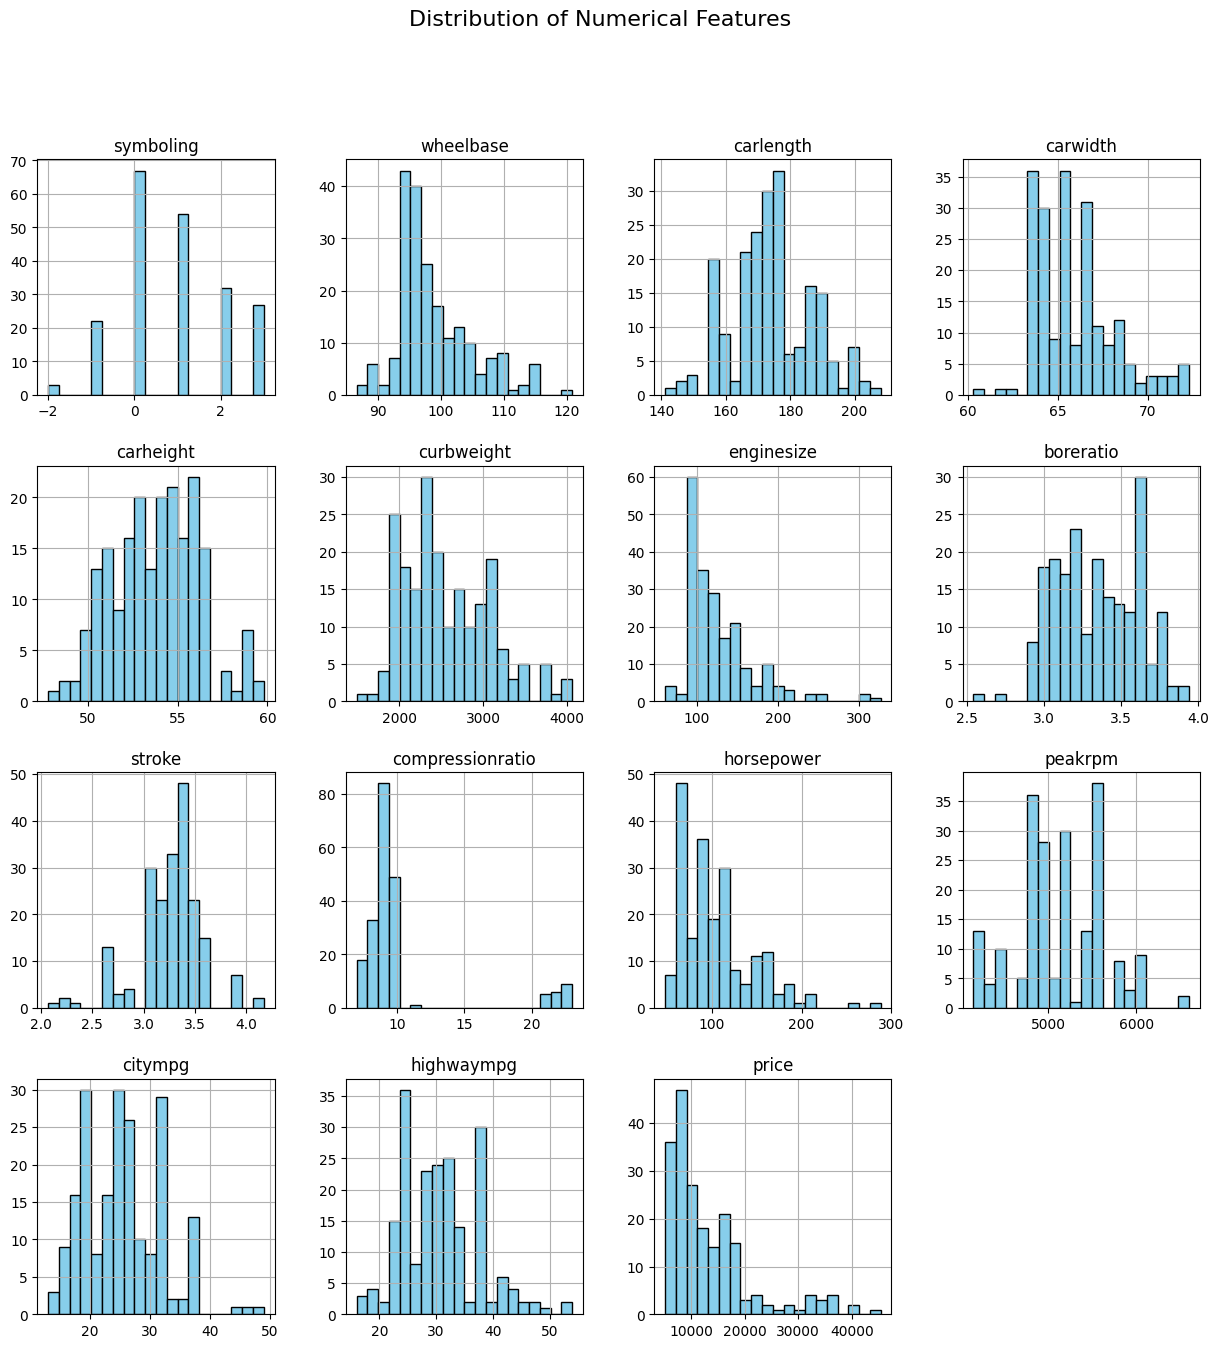

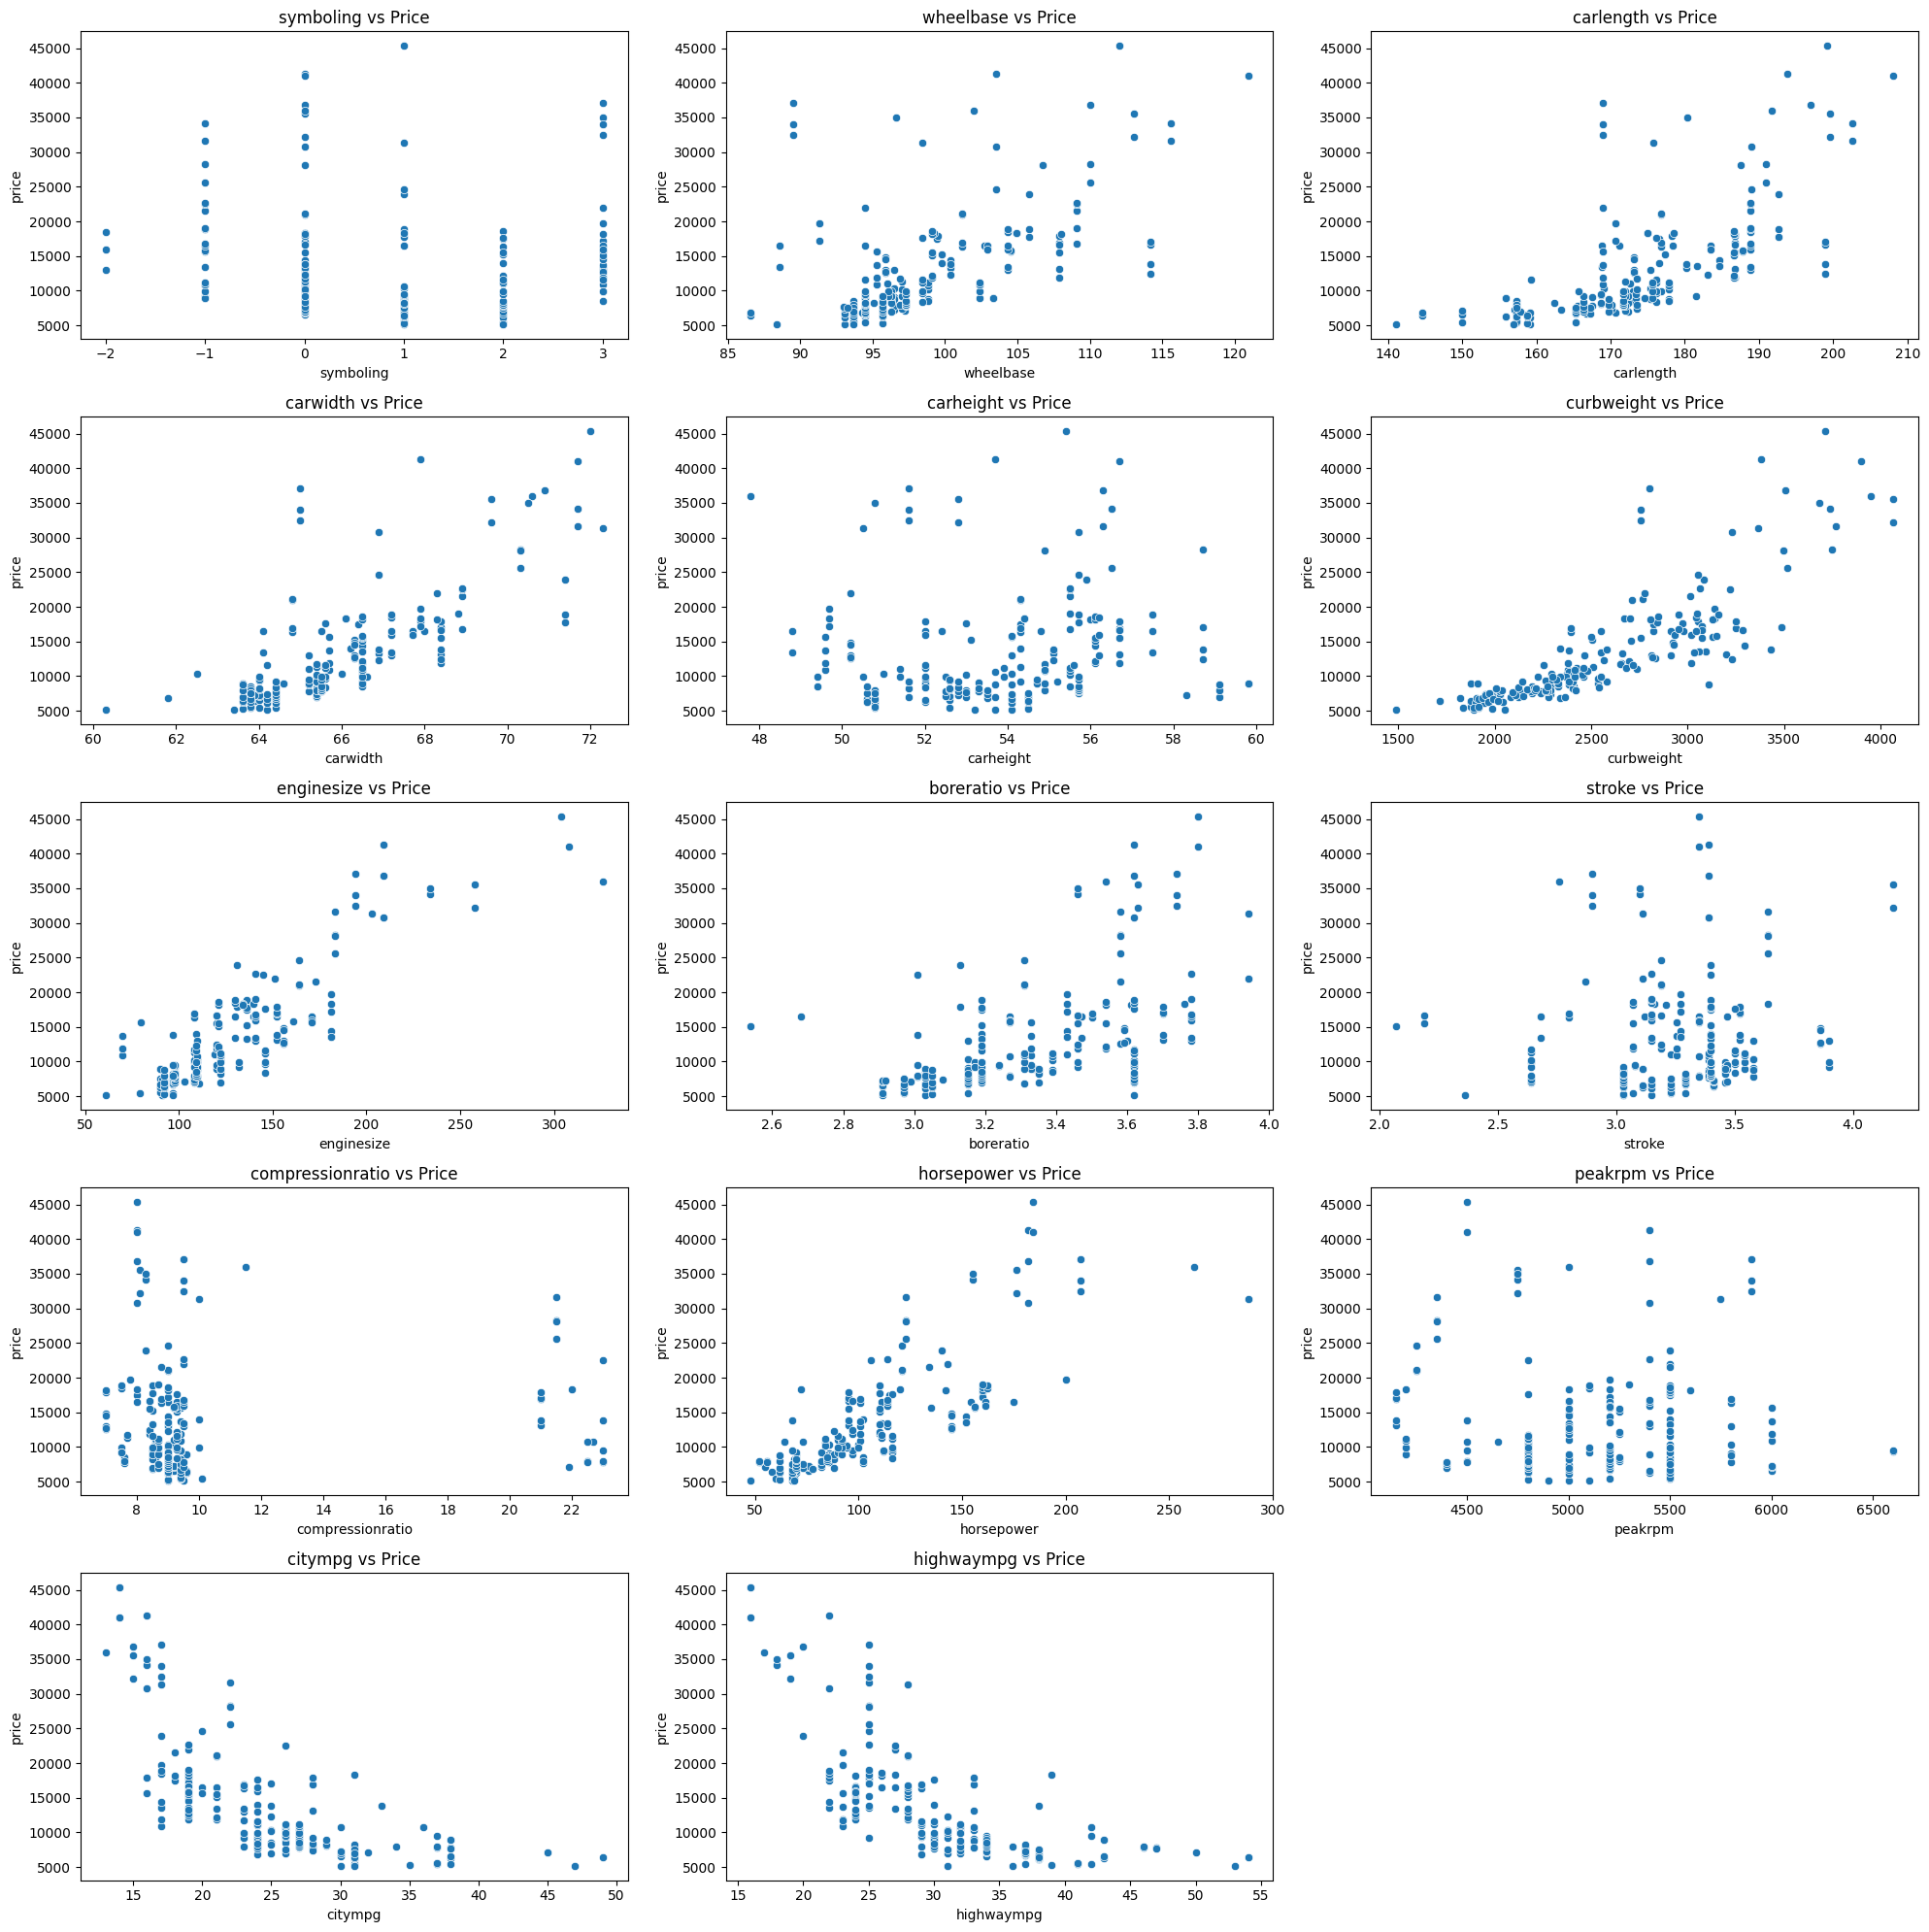

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['symboling','wheelbase','carlength','carwidth','carheight',
            'curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

# Histograms
df_raw[num_cols].hist(figsize=(15,15), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# Scatterplots with price
plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols[:-1], 1):   # exclude price itself
    plt.subplot(5, 3, i)
    sns.scatterplot(x=df_raw[col], y=df_raw['price'])
    plt.title(f"{col} vs Price")
plt.tight_layout()
plt.show()

#### *2. Categorical Features Analysis*

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2613542262.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_raw, palette="Set2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2613542262.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_raw, palette="Set2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2613542262.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_raw, palette="Set2")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2613542262.py:8: FutureWarning: 

Passing `palet

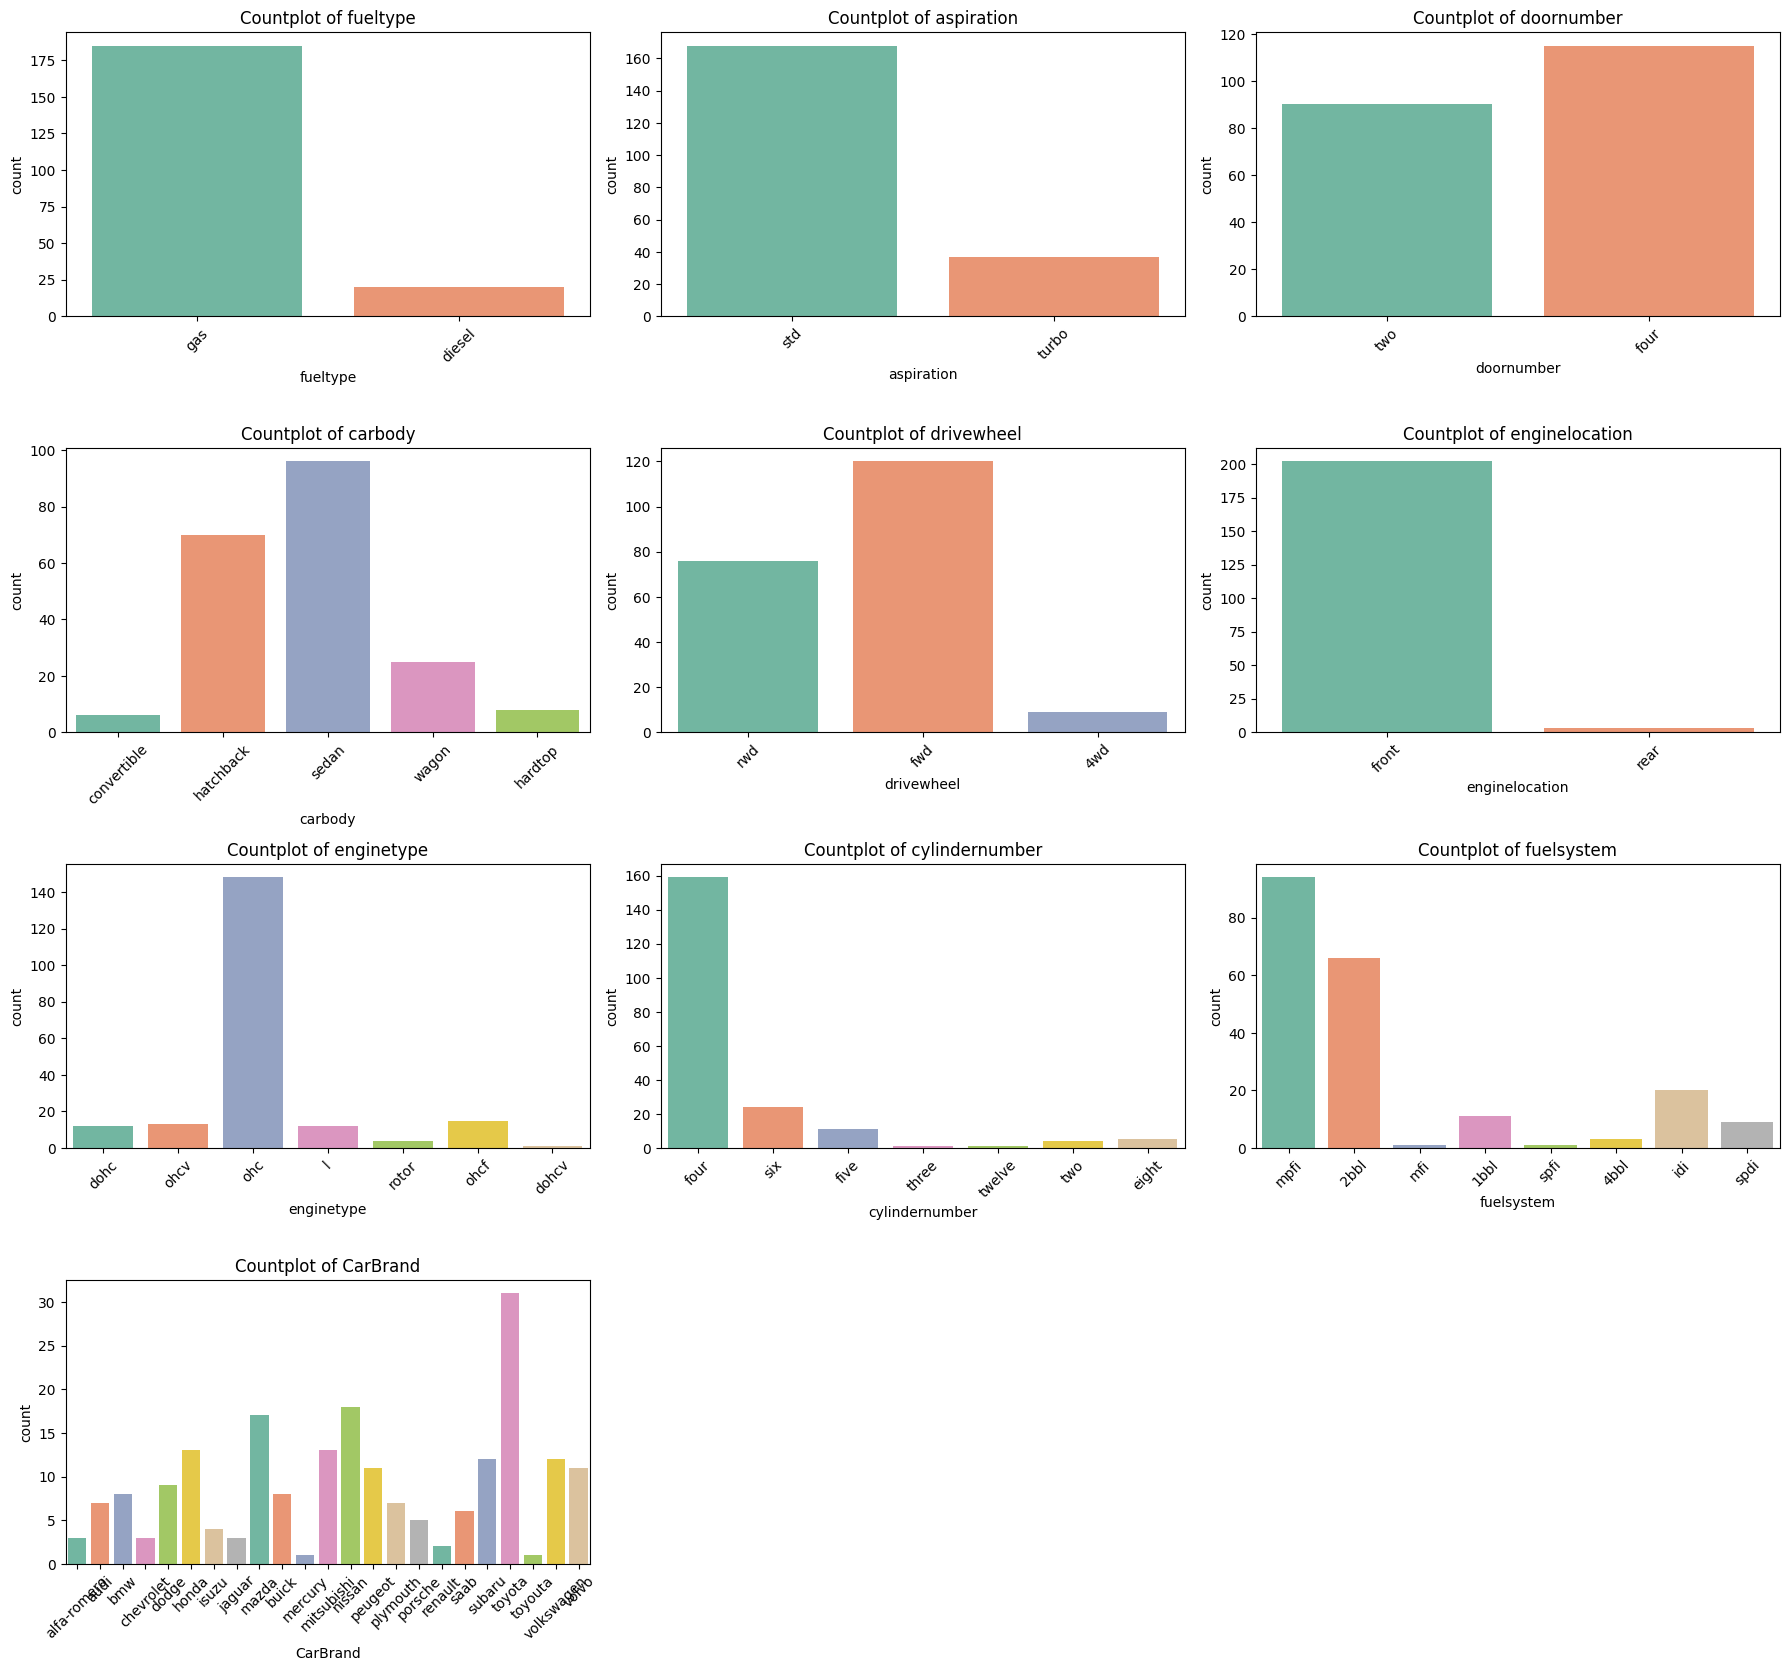

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2613542262.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="price", data=df_raw, palette="Set3")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2613542262.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="price", data=df_raw, palette="Set3")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2613542262.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="price", data=df_raw, palette="Set3")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\2613542262.py:18: 

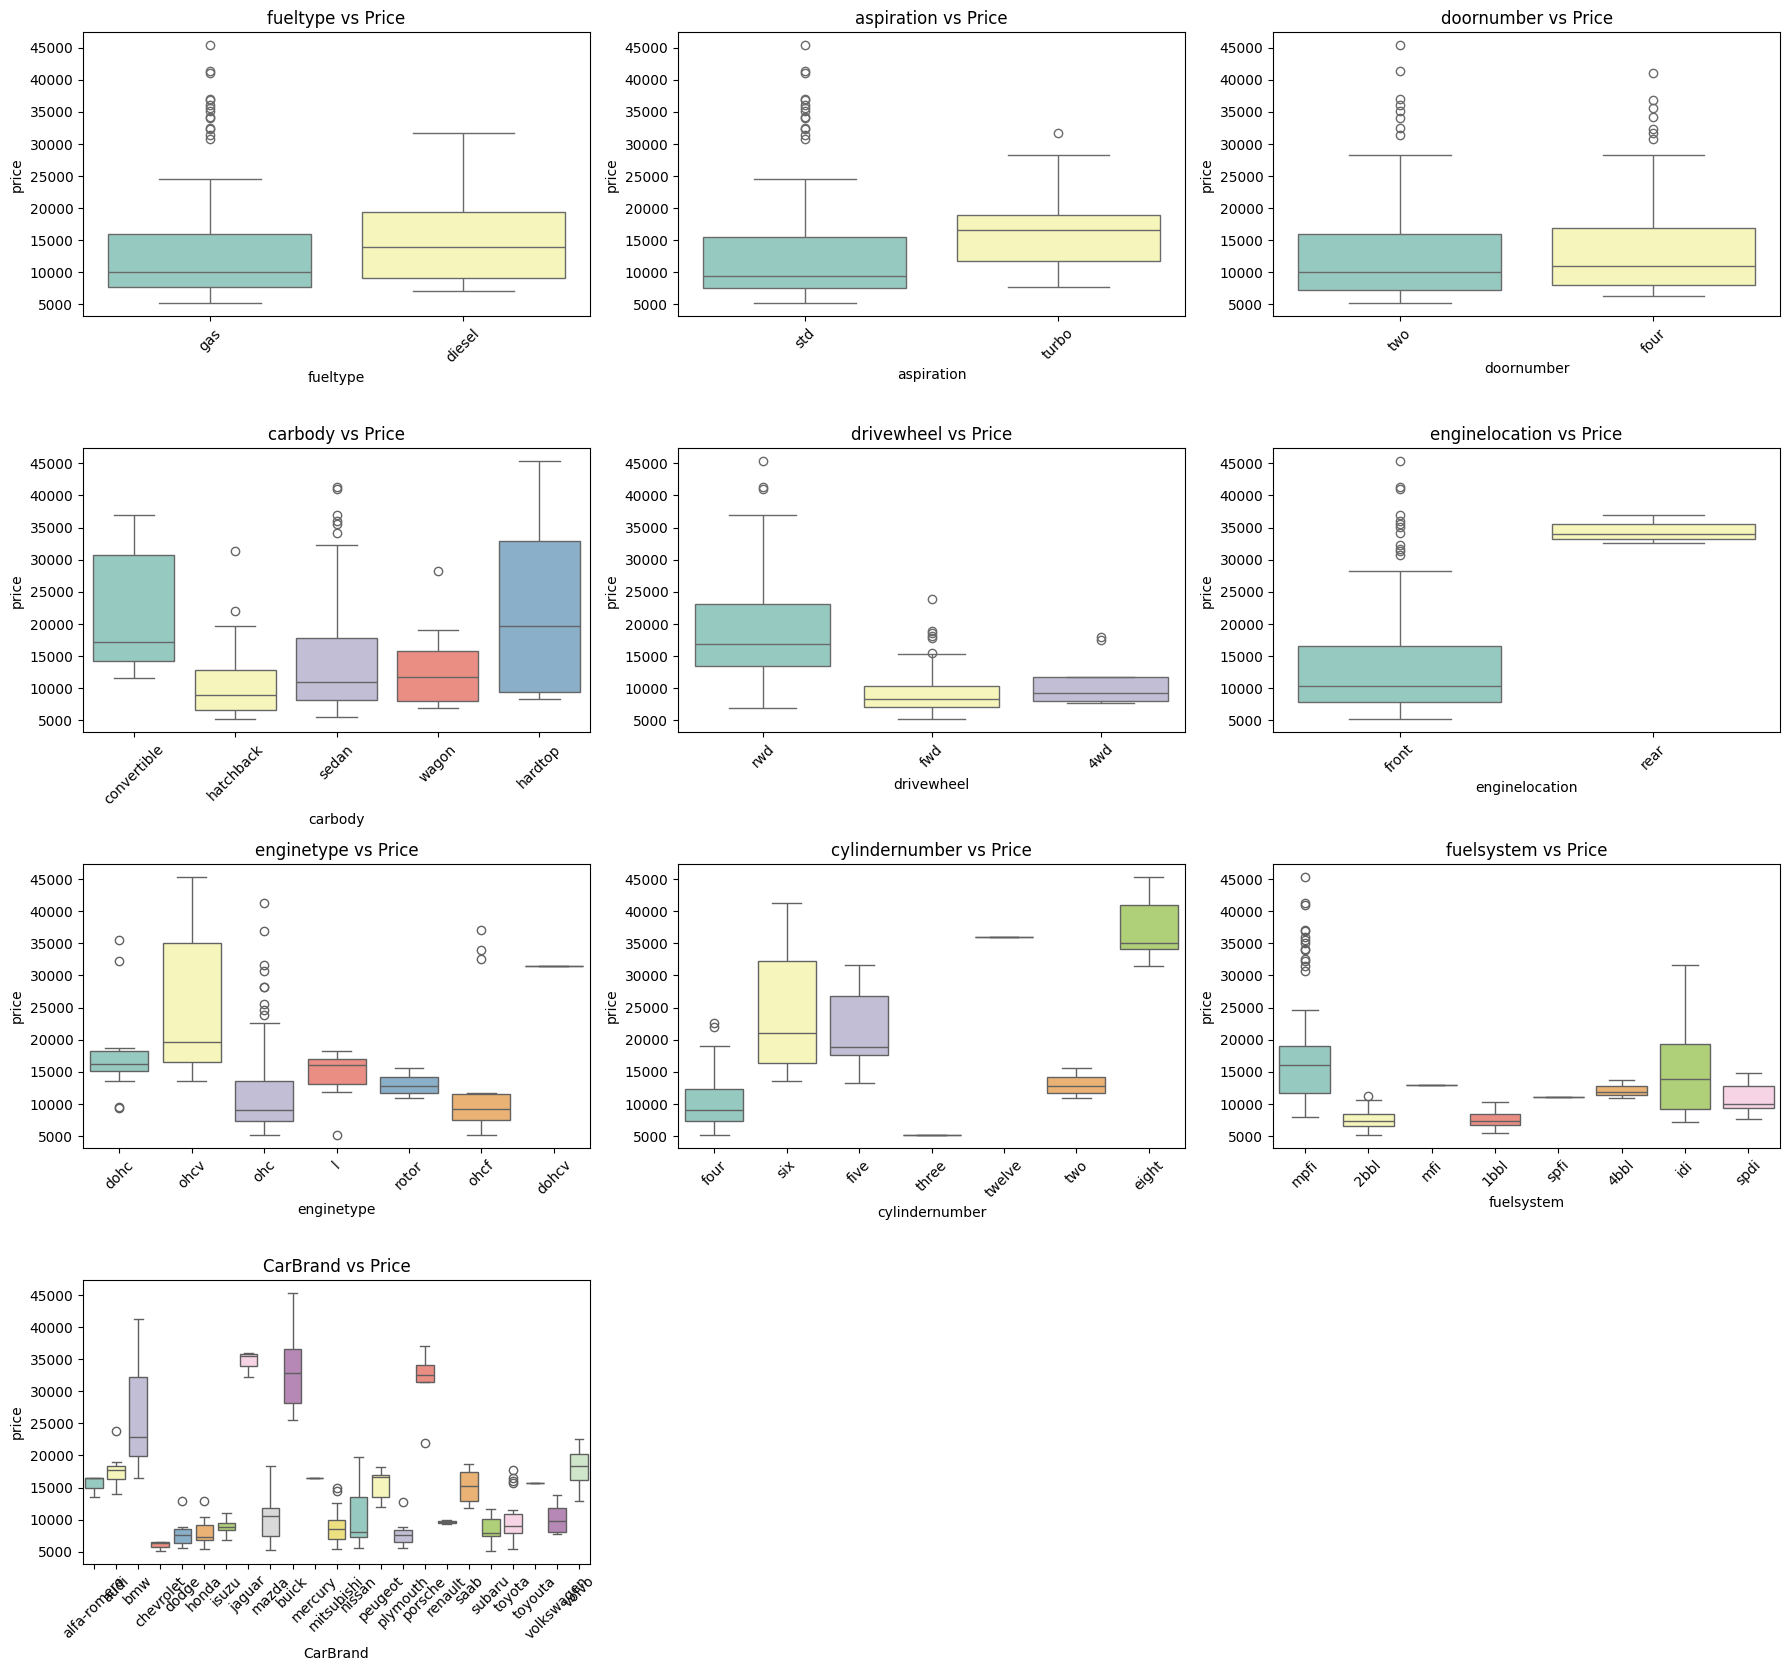

In [12]:
cat_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
            'drivewheel', 'enginelocation', 'enginetype', 
            'cylindernumber', 'fuelsystem', 'CarBrand']

plt.figure(figsize=(18, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 3, i)
    sns.countplot(x=col, data=df_raw, palette="Set2")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplots with Price
plt.figure(figsize=(18, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=col, y="price", data=df_raw, palette="Set3")
    plt.title(f"{col} vs Price")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### *3. Correlation Analyis(Encoding Data)*

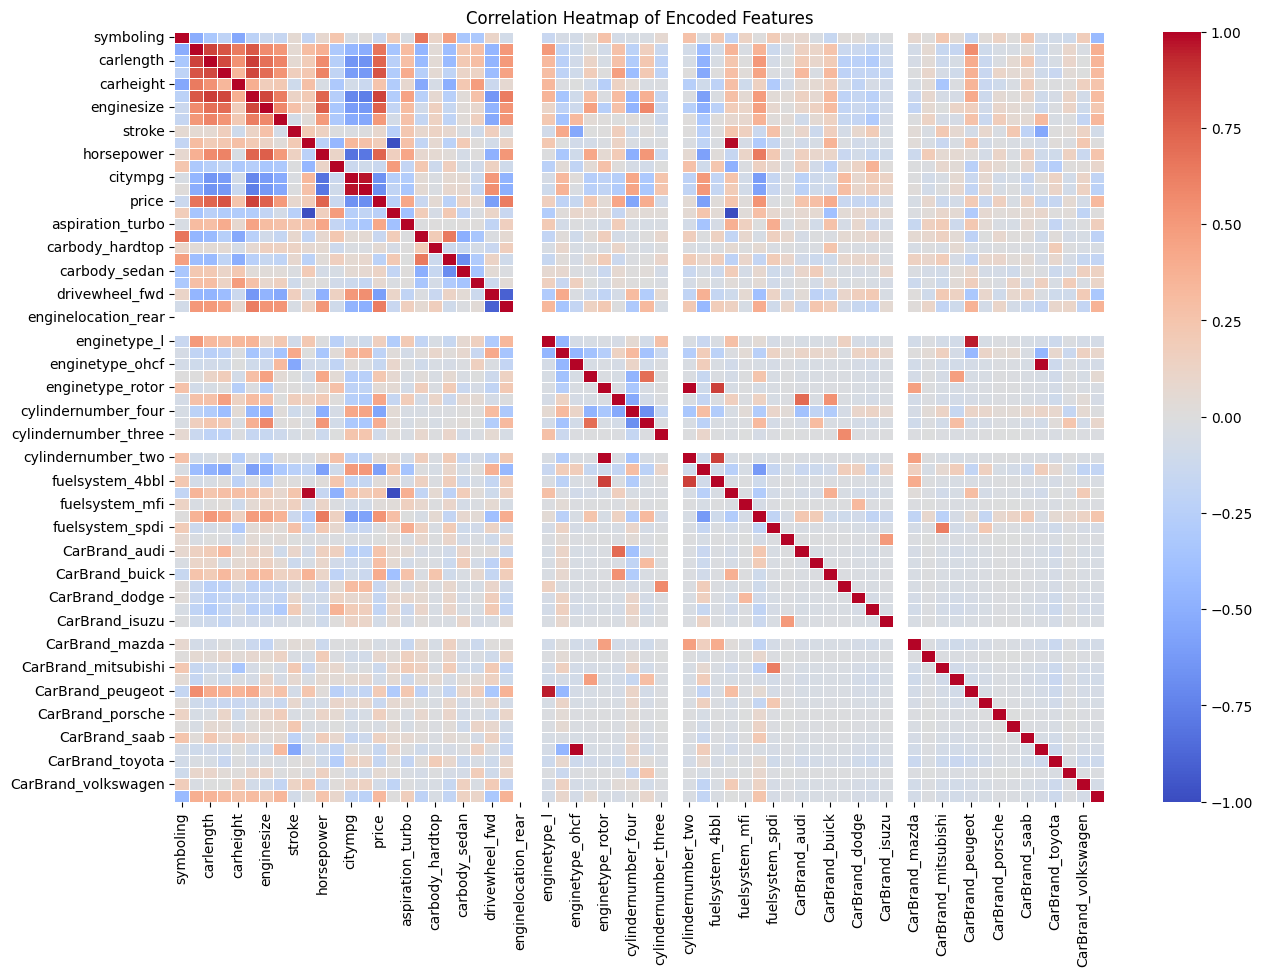

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Encoded Features")
plt.show()

#### *4. Featured Enginerring*

In [14]:
from sklearn.preprocessing import StandardScaler

# One-hot encoding (already done)
# df = pd.get_dummies(df, drop_first=True)

# Scaling numerical features
scaler = StandardScaler()
num_features = ['symboling','wheelbase','carlength','carwidth','carheight',
                'curbweight','enginesize','boreratio','stroke',
                'compressionratio','horsepower','peakrpm','citympg','highwaympg']

df[num_features] = scaler.fit_transform(df[num_features])

# Final shape
print("Final dataset shape:", df.shape)

Final dataset shape: (190, 66)


### *Phase 6. Data Splitting*
#### *1. Train - Test Split*

In [15]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df.drop("price", axis=1)
y = df["price"]

# Train-test split (80-20 is common)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (152, 65) (152,)
Test set shape: (38, 65) (38,)


#### *2. Cross-Validation Setup*

In [16]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Model
linreg = LinearRegression()

# K-Fold Cross Validation (5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(linreg, X, y, cv=kf, scoring="r2")

print("Cross-validation R2 scores:", cv_scores)
print("Average R2:", np.mean(cv_scores))

Cross-validation R2 scores: [0.87112515 0.75385798 0.75138418 0.90115315 0.81283367]
Average R2: 0.8180708263848719


#### *3. OLS Regresssion(Statsmodel)*

In [20]:
print(X_train.dtypes.value_counts())
print(X_train.dtypes[X_train.dtypes == 'object'])

bool       51
float64    14
Name: count, dtype: int64
Series([], dtype: object)


In [21]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [22]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     36.45
Date:                Fri, 19 Sep 2025   Prob (F-statistic):           1.55e-45
Time:                        23:12:40   Log-Likelihood:                -1277.1
No. Observations:                 152   AIC:                             2666.
Df Residuals:                      96   BIC:                             2836.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9237.31

#### *2. Linear Regression (Sklearn)*

In [23]:
from sklearn.linear_model import LinearRegression

# Initialize & fit model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Coefficients
print("Intercept:", linreg.intercept_)
print("Number of coefficients:", len(linreg.coef_))

Intercept: 16495.20534141573
Number of coefficients: 65


#### *3.Model Evaluation*

In [24]:
from sklearn.metrics import r2_score, mean_squared_error

# Predictions
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Train performance
print("Train R2:", r2_score(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Test performance
print("Test R2:", r2_score(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R2: 0.9543056282552779
Train RMSE: 1078.1352040718848
Test R2: 0.8711251480481218
Test RMSE: 1471.8445590811416


#### *4. Visualization*

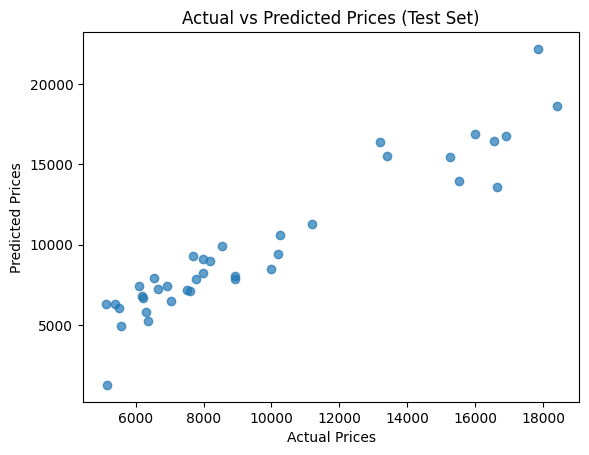

In [33]:
# 1. Actual vs Predicted (Test Data)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Test Set)")
plt.show()

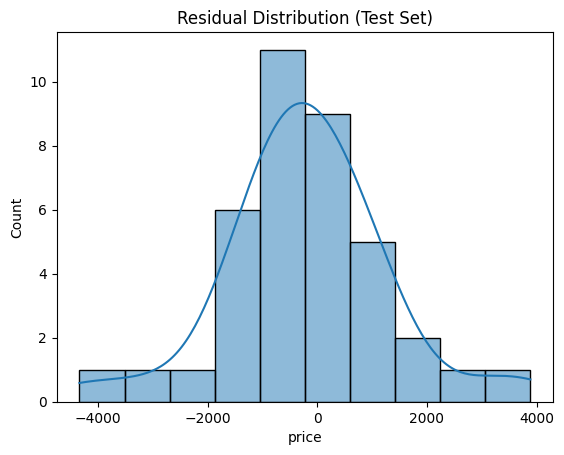

In [32]:
# 2. Residuals Distribution
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (Test Set)")
plt.show()

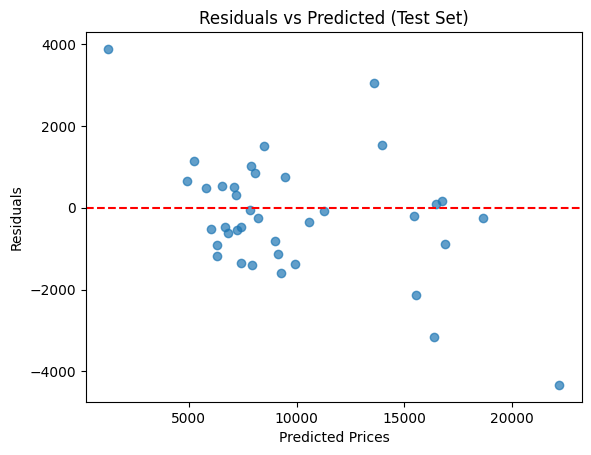

In [31]:
# 3. Residuals vs Predicted
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Test Set)")
plt.show()

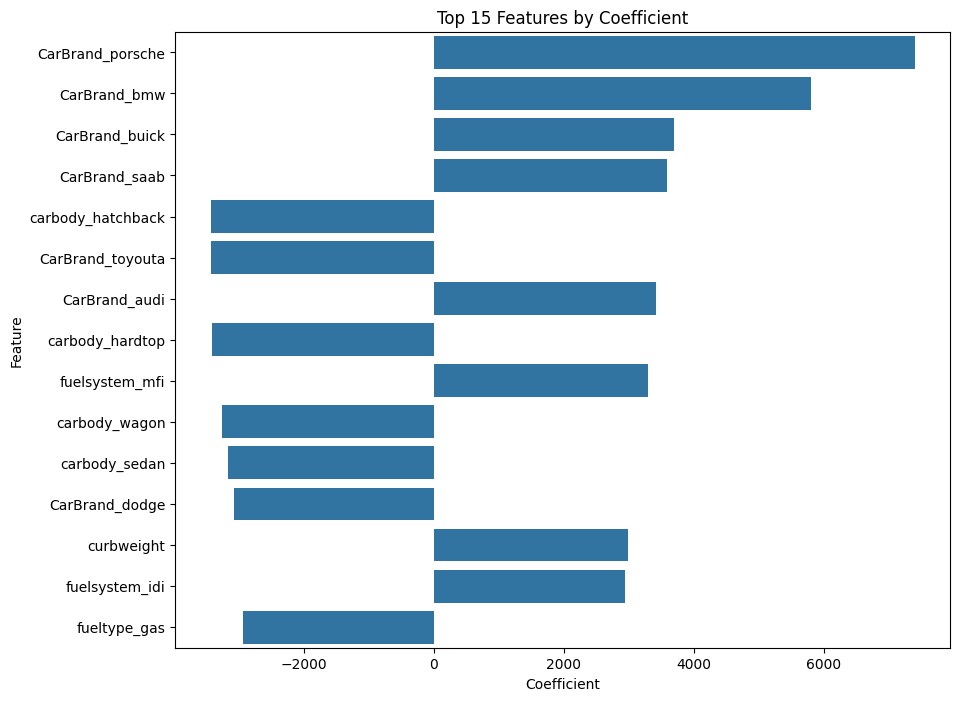

In [30]:
# 4. Feature Importance (Coefficients)
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10,8))
sns.barplot(data=coef_df.head(15), x="Coefficient", y="Feature")
plt.title("Top 15 Features by Coefficient")
plt.show()

### *Multicollinearity Check & Fix*

In [34]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
X = X_train.copy()
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False).head(15))

# Drop features with very high VIF iteratively (example shown)
# You can refine this manually depending on results
high_vif_features = ['enginesize', 'horsepower', 'curbweight', 'citympg', 'highwaympg']
X_train_reduced = X_train.drop(columns=high_vif_features, errors='ignore')
X_test_reduced = X_test.drop(columns=high_vif_features, errors='ignore')

# Refit model on reduced set
linreg.fit(X_train_reduced, y_train)
print("New Train R2:", r2_score(y_train, linreg.predict(X_train_reduced)))
print("New Test R2:", r2_score(y_test, linreg.predict(X_test_reduced)))


C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\ASUS\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                Feature         VIF
32   cylindernumber_six         inf
38       fuelsystem_idi         inf
29     enginetype_rotor         inf
30  cylindernumber_five         inf
31  cylindernumber_four         inf
35   cylindernumber_two         inf
14         fueltype_gas         inf
25         enginetype_l         inf
27      enginetype_ohcf         inf
55     CarBrand_peugeot         inf
60      CarBrand_subaru         inf
9      compressionratio  262.143195
12              citympg   44.917572
6            enginesize   43.250926
5            curbweight   34.715498
New Train R2: 0.9386292625100675
New Test R2: 0.8819699486277057


### *Cross-validation (10-Fold)*

In [35]:

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(linreg, X_train_reduced, y_train, cv=10, scoring='r2')
print("CV Mean R2:", cv_scores.mean())
print("CV Std:", cv_scores.std())


CV Mean R2: 0.7503014693214981
CV Std: 0.15741425133269543


### *Model Diagnostics & Visualization*

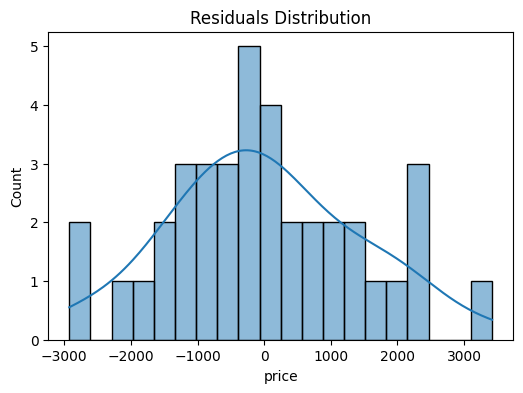

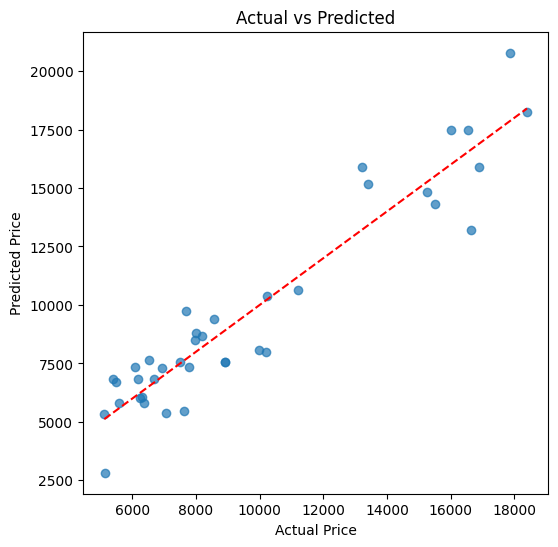

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10912\3695484057.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(15), x="Coefficient", y="Feature", palette="viridis")


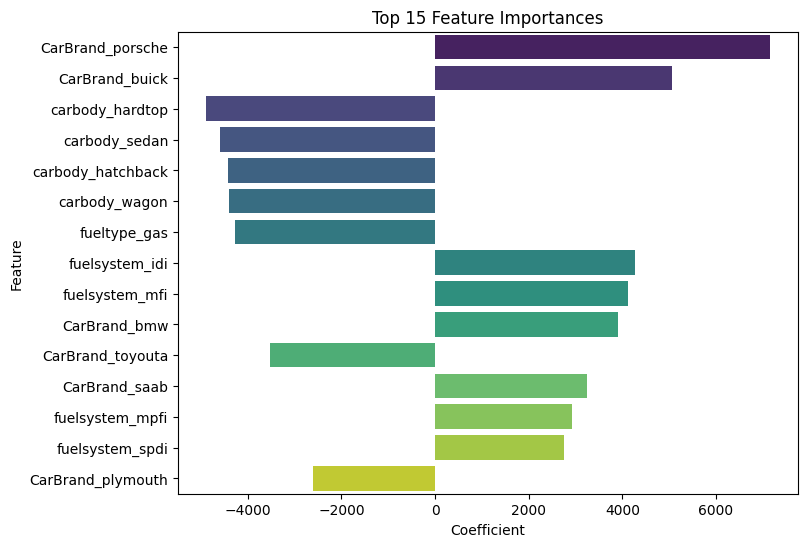

In [36]:

import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
y_pred = linreg.predict(X_test_reduced)

# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Residuals Distribution")
plt.show()

# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

# Feature importance (coefficients)
coef_df = pd.DataFrame({
    "Feature": X_train_reduced.columns,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=coef_df.head(15), x="Coefficient", y="Feature", palette="viridis")
plt.title("Top 15 Feature Importances")
plt.show()



### Final Summary
- After removing multicollinear features, the model is more stable.  
- Cross-validation shows how the model generalizes (average R² and its variance).  
- Visuals confirm residuals are roughly normal, predictions align well with actuals.  
- Key drivers (coefficients) highlight which features influence car price most.  

This completes the **Car Price Prediction Project** with Linear Regression 🚀.
